In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray, rgb2hsv, rgba2rgb
from skimage.morphology import area_opening
from skimage.exposure import histogram
from skimage.filters import threshold_otsu
from skimage import io, color
import cv2 

In [2]:
#fil = "C:/Users/vasan/OneDrive/EmissionsDatathon/Dataset/Data/Train/ang20190922t192642_ang20190922t192642-2_r4578_c217-plume.png"
fil = "C:/Users/vasan/OneDrive/EmissionsDatathon/Dataset/Data/Test/01A.png"

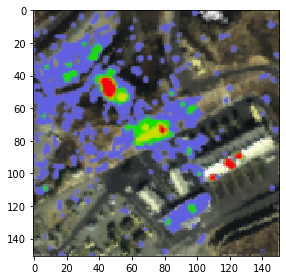

In [3]:
chico = imread(fil)
imshow(chico);

In [4]:
chico = (chico / np.max(chico)) * 255

C:\Users\vasan\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
C:\Users\vasan\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


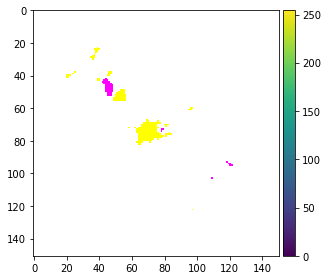

In [7]:
imshow(chico);

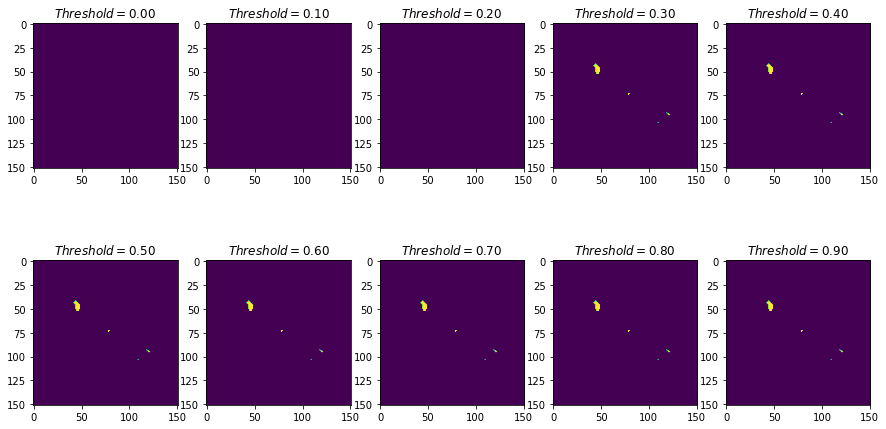

In [5]:
th_values = np.linspace(0, 1, 11)
fig, axis = plt.subplots(2, 5, figsize=(15,8))
chico_gray = rgb2gray(rgba2rgb(chico))
for th, ax in zip(th_values, axis.flatten()):
    
    chico_binarized = chico_gray < th
    ax.imshow(chico_binarized)
    ax.set_title('$Threshold = %.2f$' % th)
    
# rgb2gray(chico)

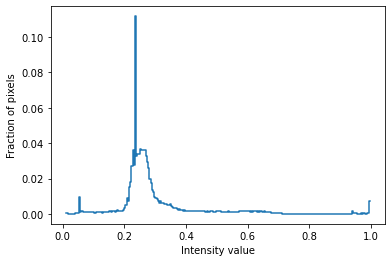

In [7]:
freq, bins = histogram(chico_gray)
plt.step(bins, freq*1.0/freq.sum())
plt.xlabel('Intensity value')
plt.ylabel('Fraction of pixels');

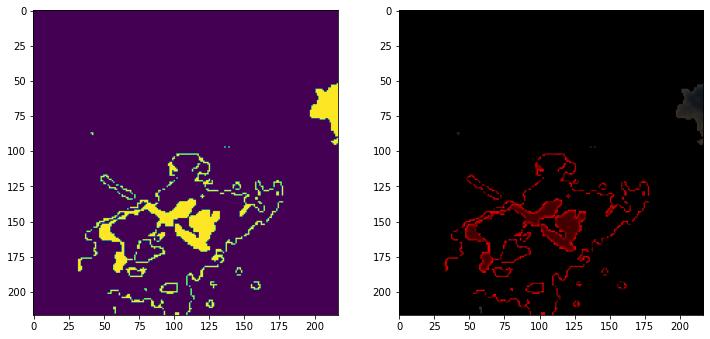

In [8]:
def masked_image(image, mask):
    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask
    return np.dstack([r,g,b])

fig, ax = plt.subplots(1, 2, figsize=(12,6))
thresh = 0.2
chico_otsu  = chico_gray < thresh
ax[0].imshow(chico_otsu)
filtered = masked_image(chico, chico_otsu)
ax[1].imshow(filtered)
#threshold_otsu(chico_gray)

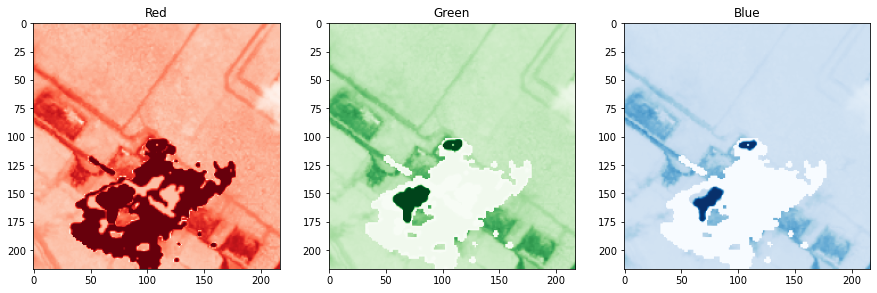

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(15,6))
ax[0].imshow(chico[:,:,0], cmap='Reds')
ax[0].set_title('Red')
ax[1].imshow(chico[:,:,1], cmap='Greens')
ax[1].set_title('Green')
ax[2].imshow(chico[:,:,2], cmap='Blues')
ax[2].set_title('Blue');

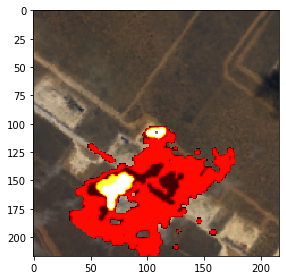

In [10]:
imshow(chico);

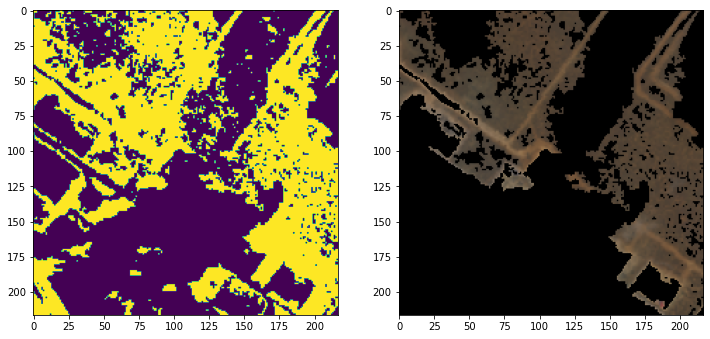

In [11]:
figure, ax = plt.subplots(1,2, figsize=(12,6))
chico_red = chico[:,:,0]
chico_green = chico[:,:,1]
chico_blue = chico[:,:,2]
binarized = ((chico_red < 200) & (chico_red > 75) & 
             (chico_green < 120) & (chico_green > 50) & 
             (chico_blue > 20))
opened = area_opening(binarized, 5000)
ax[0].imshow(binarized)
ax[1].imshow(masked_image(chico, opened))

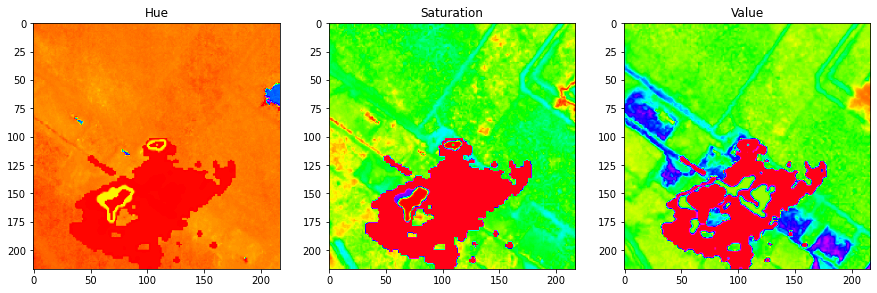

In [12]:
chico_rgb = color.rgba2rgb(chico)
chico_hsv = rgb2hsv(chico_rgb)
fig, ax = plt.subplots(1, 3, figsize=(15,6))
ax[0].imshow(chico_hsv[:,:,0], cmap='hsv')
ax[0].set_title('Hue')
ax[1].imshow(chico_hsv[:,:,1], cmap='hsv')
ax[1].set_title('Saturation')
ax[2].imshow(chico_hsv[:,:,2], cmap='hsv')
ax[2].set_title('Value');

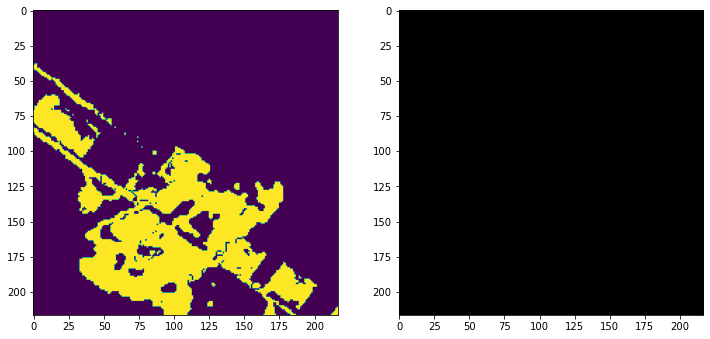

In [13]:
figure, ax = plt.subplots(1,2, figsize=(12,6))
chico_hue = chico_hsv[:,:,0] 
chico_sat = chico_hsv[:,:,1]
chico_val = chico_hsv[:,:,2]
binarized_hsv = ( (chico_val > 0.55))
opened = area_opening(binarized_hsv, 8000)
ax[0].imshow(binarized_hsv)
ax[1].imshow(masked_image(chico, opened))

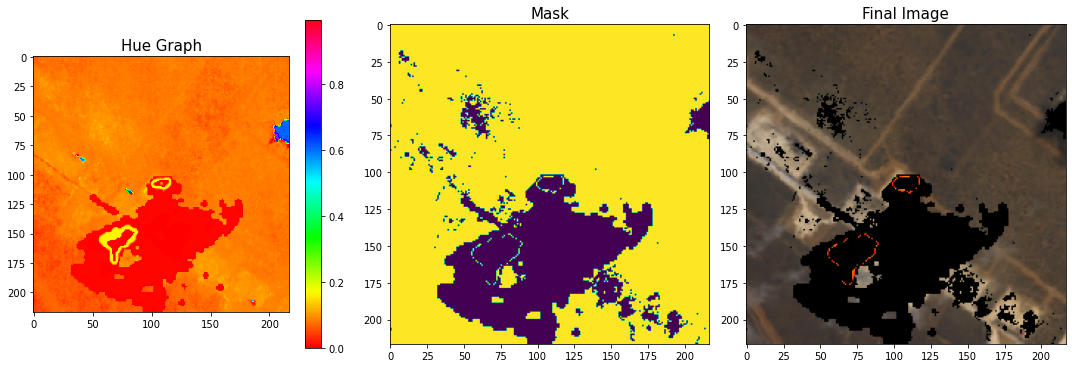

In [14]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
im = ax[0].imshow(chico_hsv[:,:,0],cmap='hsv')
fig.colorbar(im,ax=ax[0])
ax[0].set_title('Hue Graph',fontsize=15)
#set the lower and upper mask based on hue colorbar value of the desired fruit
lower_mask = chico_hsv[:,:,0] > 0.01
upper_mask = chico_hsv[:,:,0] < 0.1
mask = upper_mask*lower_mask
# get the desired mask and show in original image
red = chico_rgb[:,:,0]*mask
green = chico_rgb[:,:,1]*mask
blue = chico_rgb[:,:,2]*mask
mask2 = np.dstack((red,green,blue))
ax[1].imshow(mask)
ax[2].imshow(mask2)
ax[1].set_title('Mask',fontsize=15)
ax[2].set_title('Final Image',fontsize=15)
plt.tight_layout()
plt.show()

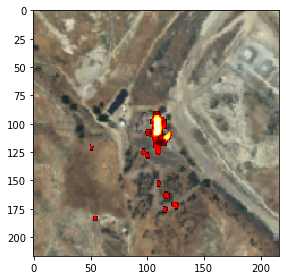

In [307]:
imshow(chico);

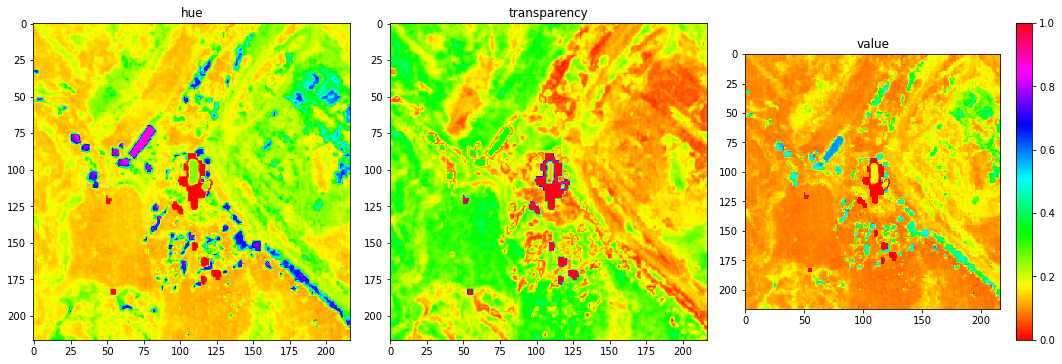

In [308]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(chico_hsv[:,:,0],cmap='hsv')
ax[0].set_title('hue')
ax[1].imshow(chico_hsv[:,:,1],cmap='hsv')
ax[1].set_title('transparency')
ax[2].imshow(chico_hsv[:,:,2],cmap='hsv')
ax[2].set_title('value')
fig.colorbar(imshow(chico_hsv[:,:,0],cmap='hsv')) 
fig.tight_layout()

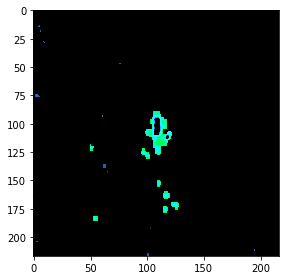

In [309]:
#refer to hue channel (in the colorbar)
lower_mask = chico_hsv[:,:,0] > 0.01 
#refer to hue channel (in the colorbar)
upper_mask = chico_hsv[:,:,0] < 0.6
#refer to transparency channel (in the colorbar)
saturation_mask = chico_hsv[:,:,1] > 0.4
#refer to transparency channel (in the colorbar)
#val_mask = chico_hsv[:,:,2] < 0.2
 
#mask = upper_mask*lower_mask*saturation_mask
mask = saturation_mask
red = chico_hsv[:,:,0]*mask
green = chico_hsv[:,:,1]*mask
blue = chico_hsv[:,:,2]*mask
bags_masked = np.dstack((red,green,blue))
imshow(bags_masked)

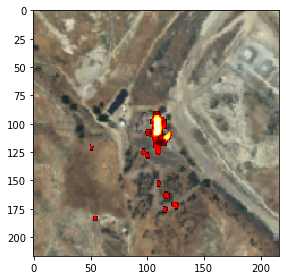

In [310]:
imshow(chico);

In [125]:
gray = cv2.cvtColor(chico, cv2.COLOR_BGR2GRAY)
img_gaussian = cv2.GaussianBlur(gray,(3,3),0)

In [127]:
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)

In [128]:
cv2.imshow("Original Image", img)
cv2.imshow("Prewitt X", img_prewittx)
cv2.imshow("Prewitt Y", img_prewitty)
cv2.imshow("Prewitt", img_prewittx + img_prewitty)

In [129]:
cv2.waitKey(0)
cv2.destroyAllWindows()

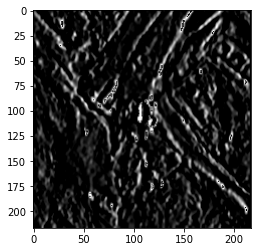

In [133]:
plt.imshow(img_prewitty+img_prewitty, cmap='gray')
plt.show()

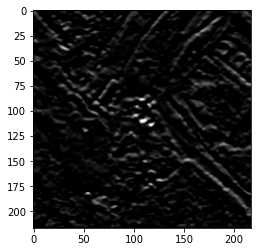

In [132]:
plt.imshow(img_prewittx, cmap='gray')
plt.show()

In [137]:
edges_prewitt_horizontal = prewitt_h(img_gaussian)

In [136]:
from skimage.filters import prewitt_h,prewitt_v

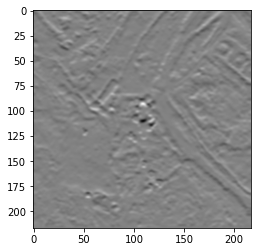

In [139]:
plt.imshow(edges_prewitt_horizontal, cmap='gray')
plt.show()

In [141]:
img_canny = cv2.Canny(chico,100,200)

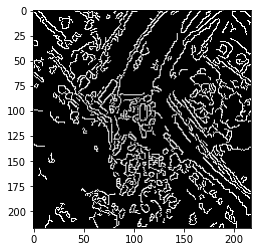

In [143]:
plt.imshow(img_canny, cmap='gray')
plt.show()

In [144]:
img_sobelx = cv2.Sobel(img_gaussian,cv2.CV_8U,1,0,ksize=5)
img_sobely = cv2.Sobel(img_gaussian,cv2.CV_8U,0,1,ksize=5)
img_sobel = img_sobelx + img_sobely

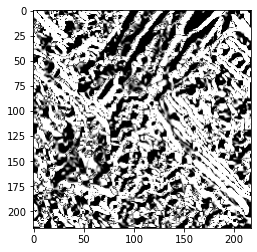

In [145]:
plt.imshow(img_sobel, cmap='gray')
plt.show()

In [154]:
#https://gist.github.com/rahit/c078cabc0a48f2570028bff397a9e154

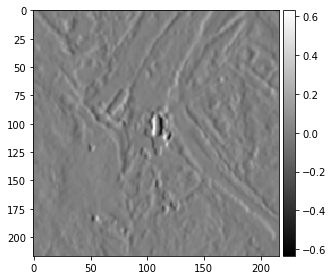

In [168]:
edges_prewitt_vertical = prewitt_v(img_gaussian)

imshow(edges_prewitt_vertical, cmap='gray')

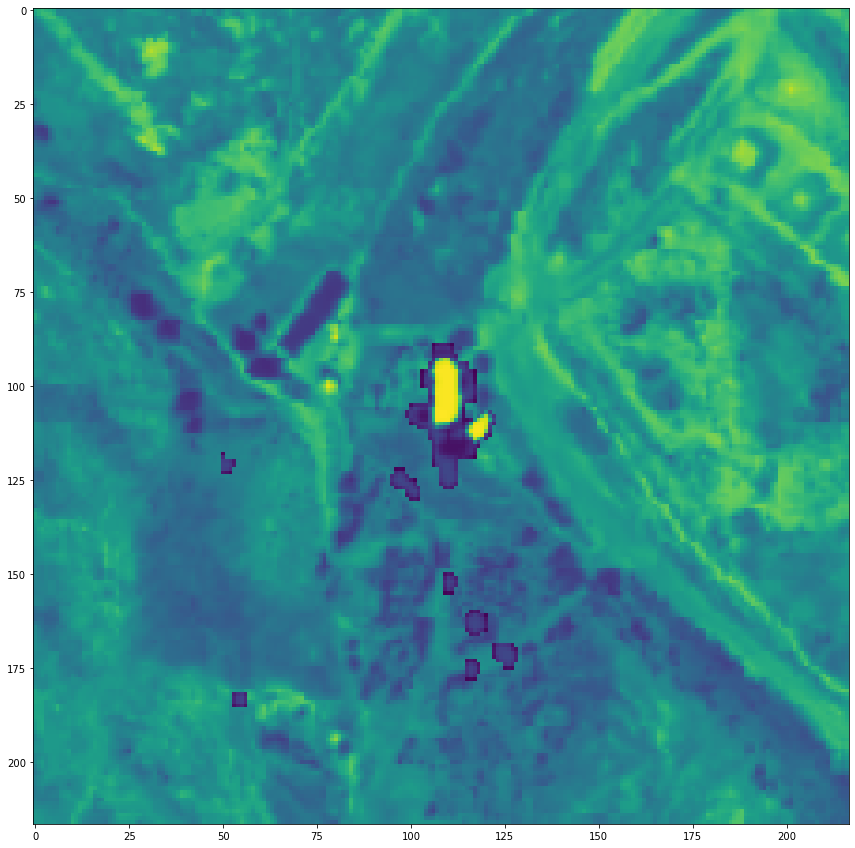

In [176]:
# Importing necessary libraries
from skimage import data
from skimage import filters
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
 
# Setting plot size to 15, 15
plt.figure(figsize=(15, 15))
 
# Sample Image of scikit-image package

chico_gray = rgb2gray(chico_rgb)
plt.imshow(chico_gray)
plt.show()

In [178]:
# Computing Otsu's thresholding value
threshold = filters.threshold_otsu(chico_gray)

In [179]:
threshold

0.4928190854779412

Text(0.5, 1.0, 'Threshold: >0.4928190854779412')

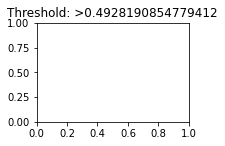

In [180]:
# Computing binarized values using the obtained
# threshold
binarized_coffee = (chico_gray > threshold)*1
plt.subplot(2,2,1)
plt.title("Threshold: >"+str(threshold))

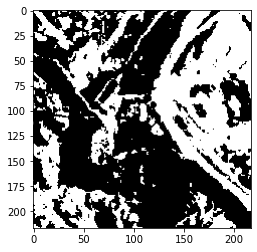

In [181]:
plt.imshow(binarized_coffee, cmap = "gray")

In [183]:
#https://github.com/jephraim-manansala/thresholding/blob/main/Image%20Segmentation%20using%20Thresholding%20Methods.ipynb

In [184]:
#https://towardsdatascience.com/image-segmentation-part-1-6e0ddb5f7f8a

In [188]:
threshold = filters.threshold_niblack(chico_gray)

Text(0.5, 1.0, 'Niblack Thresholding')

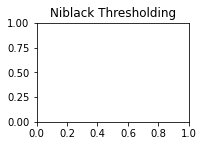

In [189]:
binarized_coffee = (chico_gray > threshold)*1
plt.subplot(2,2,2)
plt.title("Niblack Thresholding")

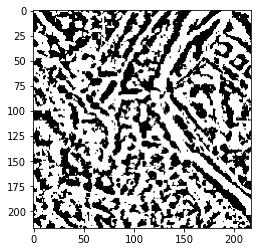

In [190]:
plt.imshow(binarized_coffee, cmap = "gray")

In [265]:
with open(fil, 'rb') as f:
    im1 = f.read()

In [266]:
im1_data = np.frombuffer(im1, dtype='uint8')
im1_data

array([137,  80,  78, ...,  66,  96, 130], dtype=uint8)

In [267]:
image_bgr2 = cv2.imdecode(im1_data, cv2.IMREAD_COLOR)
image_bgr2

array([[[ 42,  50,  57],
        [ 42,  50,  57],
        [ 42,  49,  56],
        ...,
        [ 74, 110, 120],
        [ 75, 110, 120],
        [ 75, 112, 124]],

       [[ 44,  52,  59],
        [ 42,  50,  56],
        [ 40,  47,  52],
        ...,
        [ 69,  99, 110],
        [ 67,  96, 106],
        [ 64,  93, 103]],

       [[ 42,  51,  55],
        [ 42,  51,  56],
        [ 41,  49,  54],
        ...,
        [ 67,  97, 109],
        [ 62,  87,  96],
        [ 50,  65,  70]],

       ...,

       [[ 77,  86,  80],
        [ 67,  72,  66],
        [ 55,  60,  53],
        ...,
        [ 48,  60,  68],
        [ 51,  65,  75],
        [ 52,  67,  77]],

       [[ 78,  90,  84],
        [ 61,  67,  61],
        [ 58,  65,  61],
        ...,
        [ 63,  82,  89],
        [ 70,  92, 102],
        [ 58,  76,  85]],

       [[ 92, 112, 107],
        [ 62,  69,  65],
        [ 66,  75,  70],
        ...,
        [ 54,  68,  72],
        [ 57,  73,  80],
        [ 58,  76,  84]]

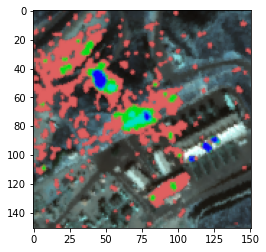

In [268]:
plt.imshow(image_bgr2)
plt.show()

In [269]:
image_hsv = cv2.cvtColor(image_bgr2, cv2.COLOR_BGR2HSV)

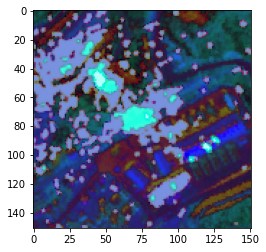

In [270]:
plt.imshow(image_hsv)
plt.show()

In [271]:
image_gray = cv2.cvtColor(image_bgr2, cv2.COLOR_BGR2GRAY)

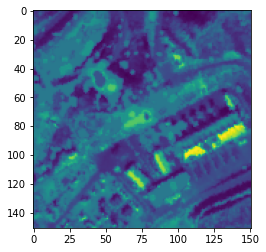

In [272]:
plt.imshow(image_gray)
plt.show()

In [275]:
mask = cv2.inRange(image_bgr2, (0,255,255), (0,255,255))

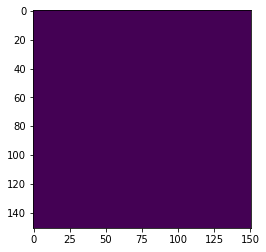

In [276]:
plt.imshow(mask)
plt.show()

In [242]:
if len(np.where(mask != 0)[0]) != 0:
    y1 = min(np.where(mask != 0)[0])
    y2 = max(np.where(mask != 0)[0])
else:
    y1 = 0                                     
    y2 = len(mask)
if len(np.where(mask != 0)[1]) != 0:
    x1 = min(np.where(mask != 0)[1])
    x2 = max(np.where(mask != 0)[1])
else:
    x1 = 0
    x2 = len(mask[0])

In [250]:
image_cropped = image_gray[y1:y2, x1:x2]

In [256]:
if image_cropped.size ==0:
    image_cropped
else:
    image_150x150 = cv2.resize(image_cropped, (150, 150))

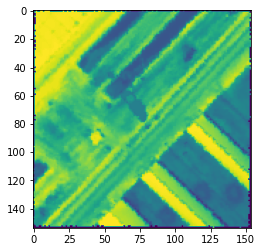

In [259]:
plt.imshow(image_cropped)
plt.show()

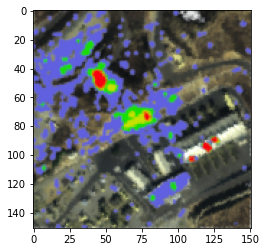

In [262]:
plt.imshow(chico)

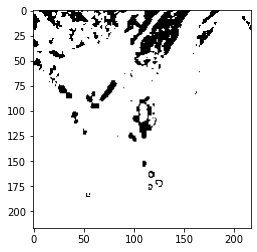

In [263]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

C:\Users\vasan\AppData\Local\Temp/ipykernel_17188/1137983198.py:1: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  gray = rgb2gray(chico)


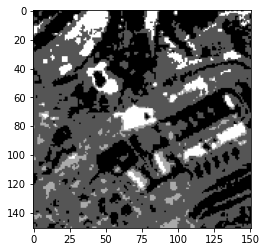

In [264]:
gray = rgb2gray(chico)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')